<a href="https://colab.research.google.com/github/Srikanthr7/Decision-Tree-Implementation/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT IRIS DATASET


In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/iris")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'iris' dataset.
Path to dataset files: /kaggle/input/iris


# DECISION TREE IMPLEMENTATION





Dataset Shape: (150, 5)

First 5 rows of dataset:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.80      0.89        15
 Iris-virginica       0.83      1.00      0.91        15

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45

Accuracy: 0.9333333333333333


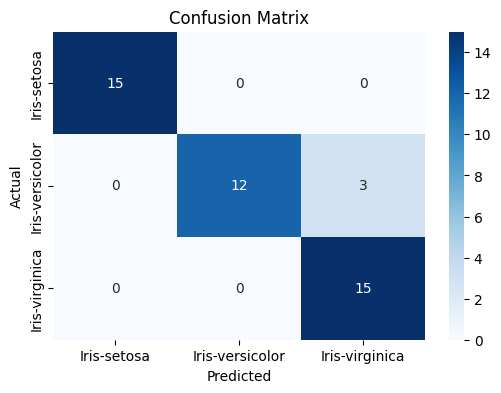

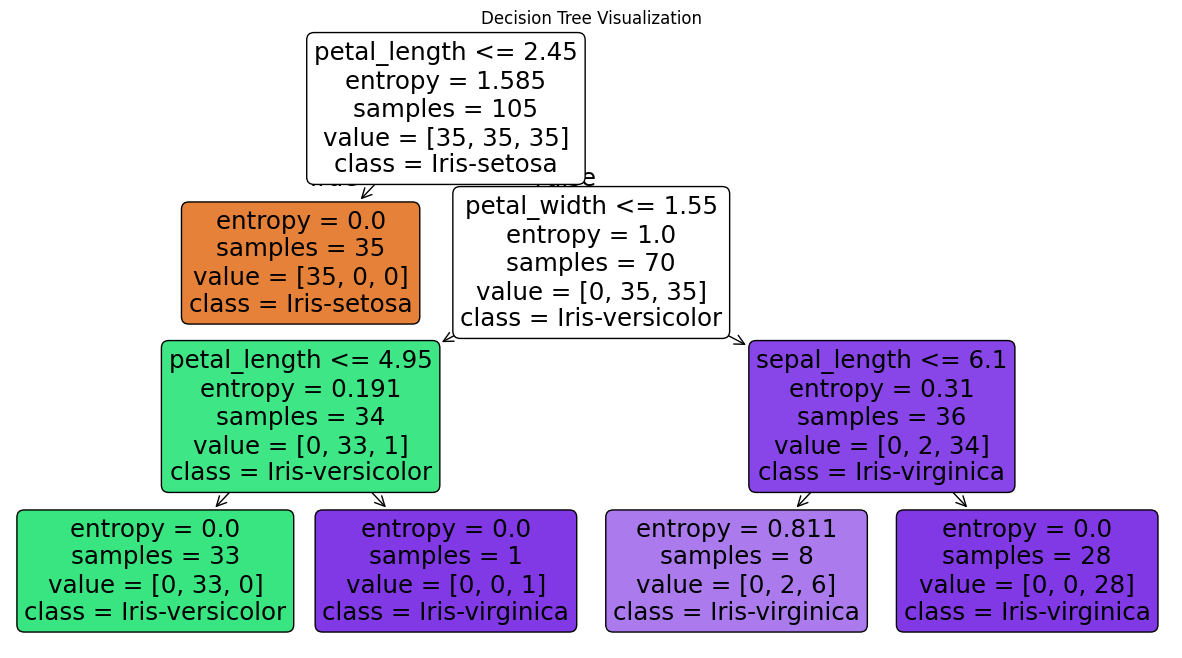


Decision Tree Rules:

|--- petal_length <= 2.45
|   |--- class: Iris-setosa
|--- petal_length >  2.45
|   |--- petal_width <= 1.55
|   |   |--- petal_length <= 4.95
|   |   |   |--- class: Iris-versicolor
|   |   |--- petal_length >  4.95
|   |   |   |--- class: Iris-virginica
|   |--- petal_width >  1.55
|   |   |--- sepal_length <= 6.10
|   |   |   |--- class: Iris-virginica
|   |   |--- sepal_length >  6.10
|   |   |   |--- class: Iris-virginica



In [3]:

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load Dataset (Iris Dataset)
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="target")

print("Dataset Shape:", X.shape)
print("\nFirst 5 rows of dataset:")
print(X.head())

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 4: Initialize and Train Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# Step 5: Predictions
y_pred = clf.predict(X_test)

# Step 6: Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 7: Visualize Decision Tree
plt.figure(figsize=(15,8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

# Step 8: Show Tree Rules in Text Format
print("\nDecision Tree Rules:\n")
print(export_text(clf, feature_names=list(iris.feature_names)))
